# **Brett Huffman**

## **CSCI 5390**

## Main Project - Phase 4

For this phase, additional images have been added and the model has been changed to a binary classification model.

Credit: The images for this project are from personal library and from Alamy.com covered under their Personal Use license.  Images can only be used for non-commercial purposes. 

In [1]:
!git clone https://github.com/dicer2000/CSCI_5390

Cloning into 'CSCI_5390'...
remote: Enumerating objects: 1034, done.
remote: Counting objects: 100% (1034/1034), done.
remote: Compressing objects: 100% (1014/1014), done.
remote: Total 1034 (delta 23), reused 1030 (delta 19), pack-reused 0
Receiving objects: 100% (1034/1034), 35.38 MiB | 25.60 MiB/s, done.
Resolving deltas: 100% (23/23), done.


In [2]:
# Checkout just the images folder from Github
! ls -l CSCI_5390/MainProject/Images

total 32
drwxr-xr-x 2 root root  4096 Mar 12 21:32 Ash
drwxr-xr-x 2 root root  4096 Mar 12 21:32 Cedar
drwxr-xr-x 2 root root 12288 Mar 12 21:32 Honeysuckle
drwxr-xr-x 2 root root  4096 Mar 12 21:32 Maple
drwxr-xr-x 2 root root  4096 Mar 12 21:32 Oak
-rw-r--r-- 1 root root   593 Mar 12 21:32 removeBlack.py


In [3]:
# Check out the index file
import pandas as pd
df = pd.read_csv('CSCI_5390/MainProject/TreeImageMaster.csv')
df.head()

,id,image,treetype
0,1,Images/Oak/oak125.jpeg,1
1,2,Images/Oak/oak133.jpeg,1
2,3,Images/Oak/oak42.jpg,1
3,4,Images/Oak/oak56.jpg,1
4,5,Images/Oak/oak81.jpg,1


In [4]:
# Import important libraries
import tensorflow as tf
import numpy as np
import math
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from keras import layers, initializers
import matplotlib.pyplot as plt
from tensorflow import keras

In [5]:
# Generate the Validation And Test Folders

!mkdir CSCI_5390/MainProject/Training
!mkdir CSCI_5390/MainProject/Training/Images
!mkdir CSCI_5390/MainProject/Training/Images/Other
!mkdir CSCI_5390/MainProject/Training/Images/Honeysuckle

!mkdir CSCI_5390/MainProject/Validation
!mkdir CSCI_5390/MainProject/Validation/Images
!mkdir CSCI_5390/MainProject/Validation/Images/Other
!mkdir CSCI_5390/MainProject/Validation/Images/Honeysuckle

!mkdir CSCI_5390/MainProject/Testing
!mkdir CSCI_5390/MainProject/Testing/Images
!mkdir CSCI_5390/MainProject/Testing/Images/Other
!mkdir CSCI_5390/MainProject/Testing/Images/Honeysuckle


In [6]:

# Randomly move images from the main folder (Training) to Validation
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

df = shuffle(df)
npdata = np.asarray(df)

# 70% Training, 15% Test, 15 Validation
X = npdata[:, :-1]
y = npdata[:, -1]
XTRAIN, XVALID, YTRAIN, YVALID = train_test_split(X, y, test_size=0.3)
XVALID, XTEST, YVALID, YTEST = train_test_split(XVALID, YVALID, test_size=0.5)


In [7]:
print(XTRAIN.shape, YTRAIN.shape)
print(XTEST.shape, YTEST.shape)
print(XVALID.shape, YVALID.shape)

(557, 2) (557,)
(120, 2) (120,)
(120, 2) (120,)


In [8]:
# Move all the designated files over to the Training folders

for file in XTRAIN[:,1]:
  filename = str(file).strip()
  origFile = "CSCI_5390/MainProject/" + filename
  newFile = ""

  if "Honeysuckle" in filename:
    newFile  = "CSCI_5390/MainProject/Training/" + filename
  else:
    loc = filename.rfind("/")-1
    newFile  = "CSCI_5390/MainProject/Training/Images/Other" + filename[loc+1:]

  print('-----')
  print(filename)
  print(newFile)
  print(origFile)


  !mv $origFile $newFile


-----
Images/Ash/ash132.jpeg
CSCI_5390/MainProject/Training/Images/Other/ash132.jpeg
CSCI_5390/MainProject/Images/Ash/ash132.jpeg
-----
Images/Ash/ash4.jpg
CSCI_5390/MainProject/Training/Images/Other/ash4.jpg
CSCI_5390/MainProject/Images/Ash/ash4.jpg
-----
Images/Honeysuckle/hs167.jpeg
CSCI_5390/MainProject/Training/Images/Honeysuckle/hs167.jpeg
CSCI_5390/MainProject/Images/Honeysuckle/hs167.jpeg
-----
Images/Honeysuckle/hs96.jpeg
CSCI_5390/MainProject/Training/Images/Honeysuckle/hs96.jpeg
CSCI_5390/MainProject/Images/Honeysuckle/hs96.jpeg
-----
Images/Oak/oak117.jpeg
CSCI_5390/MainProject/Training/Images/Other/oak117.jpeg
CSCI_5390/MainProject/Images/Oak/oak117.jpeg
-----
Images/Honeysuckle/hs202.jpeg
CSCI_5390/MainProject/Training/Images/Honeysuckle/hs202.jpeg
CSCI_5390/MainProject/Images/Honeysuckle/hs202.jpeg
-----
Images/Ash/ash110.jpeg
CSCI_5390/MainProject/Training/Images/Other/ash110.jpeg
CSCI_5390/MainProject/Images/Ash/ash110.jpeg
-----
Images/Ash/ash1.jpg
CSCI_5390/MainProje

In [9]:
# Move all the designated files over to the Validation folders

for file in XVALID[:,1]:
  filename = str(file).strip()
  origFile = "CSCI_5390/MainProject/" + filename
  newFile = ""

  if "Honeysuckle" in filename:
    newFile  = "CSCI_5390/MainProject/Validation/" + filename
  else:
    loc = filename.rfind("/")-1
    newFile  = "CSCI_5390/MainProject/Validation/Images/Other" + filename[loc+1:]

  print('-----')
  print(filename)
  print(newFile)
  print(origFile)


  !mv $origFile $newFile

-----
Images/Oak/oak154.jpeg
CSCI_5390/MainProject/Validation/Images/Other/oak154.jpeg
CSCI_5390/MainProject/Images/Oak/oak154.jpeg
-----
Images/Oak/oak140.jpeg
CSCI_5390/MainProject/Validation/Images/Other/oak140.jpeg
CSCI_5390/MainProject/Images/Oak/oak140.jpeg
-----
Images/Cedar/cdr32.jpg
CSCI_5390/MainProject/Validation/Images/Other/cdr32.jpg
CSCI_5390/MainProject/Images/Cedar/cdr32.jpg
-----
Images/Cedar/cdr39.jpg
CSCI_5390/MainProject/Validation/Images/Other/cdr39.jpg
CSCI_5390/MainProject/Images/Cedar/cdr39.jpg
-----
Images/Maple/mpl53.jpg
CSCI_5390/MainProject/Validation/Images/Other/mpl53.jpg
CSCI_5390/MainProject/Images/Maple/mpl53.jpg
-----
Images/Oak/oak40.jpg
CSCI_5390/MainProject/Validation/Images/Other/oak40.jpg
CSCI_5390/MainProject/Images/Oak/oak40.jpg
-----
Images/Oak/oak127.jpeg
CSCI_5390/MainProject/Validation/Images/Other/oak127.jpeg
CSCI_5390/MainProject/Images/Oak/oak127.jpeg
-----
Images/Cedar/cdr75.jpeg
CSCI_5390/MainProject/Validation/Images/Other/cdr75.jpeg
C

In [10]:
# Move all the designated files over to the Test folders
for file in XTEST[:,1]:
  filename = str(file).strip()
  origFile = "CSCI_5390/MainProject/" + filename
  newFile = ""

  if "Honeysuckle" in filename:
    newFile  = "CSCI_5390/MainProject/Testing/" + filename
  else:
    loc = filename.rfind("/")-1
    newFile  = "CSCI_5390/MainProject/Testing/Images/Other" + filename[loc+1:]

  print('-----')
  print(filename)
  print(newFile)
  print(origFile)



  !mv $origFile $newFile


-----
Images/Maple/mpl127.jpeg
CSCI_5390/MainProject/Testing/Images/Other/mpl127.jpeg
CSCI_5390/MainProject/Images/Maple/mpl127.jpeg
-----
Images/Cedar/cdr150.jpeg
CSCI_5390/MainProject/Testing/Images/Other/cdr150.jpeg
CSCI_5390/MainProject/Images/Cedar/cdr150.jpeg
-----
Images/Honeysuckle/hs2.jpeg
CSCI_5390/MainProject/Testing/Images/Honeysuckle/hs2.jpeg
CSCI_5390/MainProject/Images/Honeysuckle/hs2.jpeg
-----
Images/Honeysuckle/hs44.jpeg
CSCI_5390/MainProject/Testing/Images/Honeysuckle/hs44.jpeg
CSCI_5390/MainProject/Images/Honeysuckle/hs44.jpeg
-----
Images/Honeysuckle/hs233.jpeg
CSCI_5390/MainProject/Testing/Images/Honeysuckle/hs233.jpeg
CSCI_5390/MainProject/Images/Honeysuckle/hs233.jpeg
-----
Images/Maple/mpl18.jpg
CSCI_5390/MainProject/Testing/Images/Other/mpl18.jpg
CSCI_5390/MainProject/Images/Maple/mpl18.jpg
-----
Images/Oak/oak66.jpg
CSCI_5390/MainProject/Testing/Images/Other/oak66.jpg
CSCI_5390/MainProject/Images/Oak/oak66.jpg
-----
Images/Cedar/cdr51.jpeg
CSCI_5390/MainProje

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Rescale all images by 1./255
my_generator = ImageDataGenerator(rescale=1./255)
#my_generator.fit(XTRAIN)


In [26]:
# Generator for training dataset
train_dataset = my_generator.flow_from_directory( './CSCI_5390/MainProject/Training/Images', target_size=(150, 150), batch_size=32, class_mode='categorical')


Found 557 images belonging to 2 classes.


In [27]:
# Generator for validation dataset
validation_dataset = my_generator.flow_from_directory( './CSCI_5390/MainProject/Validation/Images', target_size=(150, 150), batch_size=32, class_mode='categorical')


Found 120 images belonging to 2 classes.


In [28]:
# Generator for Test dataset
test_dataset = my_generator.flow_from_directory( './CSCI_5390/MainProject/Testing/Images', target_size=(150, 150), batch_size=32, class_mode='categorical')


Found 120 images belonging to 2 classes.


In [14]:
# Check out the data shapes
for data_batch, labels_batch in train_dataset:
  print("data batch shape:", data_batch.shape)
  print("labels batch shape:", labels_batch.shape)
  break

#print( labels_batch)

data batch shape: (32, 150, 150, 3)
labels batch shape: (32, 2)


In [ ]:
# Check out the images
for _ in range(1):
    img, label = train_dataset.next()
    print("Shape: ", img.shape)
#    print("Data: ", img) 
    plt.imshow(img[0])
    plt.show()
    plt.imshow(img[1])
    plt.show()
    plt.imshow(img[2])
    plt.show()
    plt.imshow(img[3])
    plt.show()
  

In [34]:
# Model - 5 Conv / 1 Dense  ***
# 64 => 16

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath="BestModel.hdf5",
        save_best_only=True,
        monitor="val_loss"), # When we have validation data
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', 
        mode='min', 
        patience=40, 
        verbose=1)
]

data_augmentation = tf.keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = tf.keras.Input(shape=(150, 150, 3))

x = data_augmentation(inputs)    # Use for With Augmentation

#x = layers.Rescaling(1./255)(inputs)   # Use without Augmentation

x = layers.Conv2D(filters=8, kernel_size=(3, 3), activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)

x = layers.Conv2D(filters=16, kernel_size=(3, 3), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)

x = layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=128, kernel_size=(3, 3), activation="relu")(x)


x = layers.Dropout(0.25)(x)
x = layers.Flatten()(x)

x = layers.Dense(4, activation="relu")(x)
outputs = layers.Dense(2, activation="sigmoid")(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)
  
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [35]:
# Let loose the dogs
history = model.fit(train_dataset, validation_data=validation_dataset, epochs=200, callbacks=callbacks)

Epoch 1/200
18/18 [==============================] - 2s 85ms/step - loss: 0.6943 - accuracy: 0.6625 - val_loss: 0.6856 - val_accuracy: 0.8000
Epoch 2/200
18/18 [==============================] - 1s 72ms/step - loss: 0.6869 - accuracy: 0.6894 - val_loss: 0.6806 - val_accuracy: 0.8000
Epoch 3/200
18/18 [==============================] - 1s 74ms/step - loss: 0.6840 - accuracy: 0.6894 - val_loss: 0.6758 - val_accuracy: 0.8000
Epoch 4/200
18/18 [==============================] - 1s 73ms/step - loss: 0.6810 - accuracy: 0.6894 - val_loss: 0.6713 - val_accuracy: 0.8000
Epoch 5/200
18/18 [==============================] - 1s 74ms/step - loss: 0.6782 - accuracy: 0.6894 - val_loss: 0.6665 - val_accuracy: 0.8000
Epoch 6/200
18/18 [==============================] - 1s 74ms/step - loss: 0.6754 - accuracy: 0.6894 - val_loss: 0.6619 - val_accuracy: 0.8000
Epoch 7/200
18/18 [==============================] - 1s 76ms/step - loss: 0.6727 - accuracy: 0.6894 - val_loss: 0.6575 - val_accuracy: 0.8000
Epoch 

In [26]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 150, 150, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 148, 148, 8)       224       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 8)        0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 72, 72, 16)        1168      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 16)       0         
 2D)                                                       

In [36]:
# Loads the weights
model.load_weights("BestModel.hdf5")

In [19]:
print(history.history["accuracy"])

[0.7001795172691345, 0.7037702202796936, 0.7037702202796936, 0.7109515070915222, 0.7163375020027161, 0.7324954867362976, 0.739676833152771, 0.7360861897468567, 0.7342908382415771, 0.7522441744804382, 0.7378814816474915, 0.7486534714698792, 0.7755835056304932, 0.7324954867362976, 0.7576301693916321, 0.7612208127975464, 0.7863554954528809, 0.7612208127975464, 0.7845601439476013, 0.7737881541252136, 0.7827647924423218, 0.7881507873535156, 0.7773787975311279, 0.7917414903640747, 0.7917414903640747, 0.7522441744804382, 0.7881507873535156, 0.795332133769989, 0.8043087720870972, 0.8025134801864624, 0.8222621083259583, 0.7881507873535156, 0.8114901185035706, 0.809694766998291, 0.8114901185035706, 0.8294434547424316, 0.8043087720870972, 0.8150807619094849, 0.8150807619094849, 0.8384200930595398, 0.8384200930595398, 0.8276481032371521, 0.8276481032371521, 0.8491920828819275, 0.8438060879707336, 0.836624801158905, 0.8581687808036804, 0.850987434387207, 0.850987434387207, 0.8581687808036804, 0.847

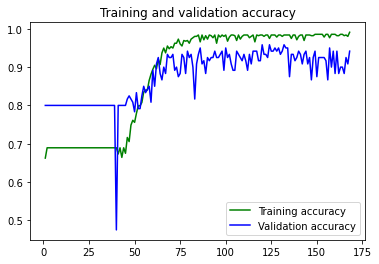

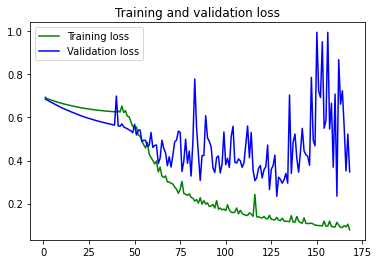

In [37]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "g", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "g", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [38]:

# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [46]:
# When using generators, you can calculate precision, recall, F1-score, etc. using the following idea (roughly)
Y = [] # empty list of true labels
P = [] # empty list of predictions


for _ in range(1):
  img, label = test_dataset.next()
  p = model.predict(img)
  Y.extend(label)
  P.extend(p)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(Y, p.round())
precision = precision_score(Y, p.round(), average="macro") # precision_score(Y, p.round())
recall = recall_score(Y, p.round(), average="macro")
f1 = f1_score(Y, p.round(), average="macro")

print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
print('F1: ', f1)

Accuracy:  0.9166666666666666
Precision:  0.9375
Recall:  0.9
F1:  0.9111111111111112


In [ ]:
while True:pass